In [339]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [340]:
Matches = pd.read_csv('Data/WorldCupMatches.csv')
Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [341]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [342]:
# Matches.dropna(inplace=True)

In [343]:
Matches.replace('Germany FR','Germany',inplace=True)
Matches.replace('FRG','GER',inplace=True)

In [344]:
Matches.drop_duplicates(subset=['MatchID'],keep='last',inplace=True)

In [345]:
FinalMatches =Matches[Matches['Stage'].str.contains('Final')]

### Kiểm tra trùng lặp Id trận đấu

- Kiểm tra lại có trùng lặp hoàn toàn hay không?

In [346]:
FinalMatches.drop_duplicates(subset=['MatchID'],keep='last',inplace=True)

C:\Users\Admin-s\AppData\Local\Temp\ipykernel_10292\1295379931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalMatches.drop_duplicates(subset=['MatchID'],keep='last',inplace=True)


In [347]:
FinalMatches.reset_index()

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,17,1930,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4,2,Argentina,...,68346.0,1,2,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405,1087,URU,ARG
1,34,1934,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,...,55000.0,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490,1134,ITA,TCH
2,52,1938,19 Jun 1938 - 17:00,Final,Stade Olympique,Colombes,Italy,4,2,Hungary,...,45000.0,3,1,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487,1174,ITA,HUN
3,100,1954,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany,3,2,Hungary,...,62500.0,2,2,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484,1278,GER,HUN
4,135,1958,29 Jun 1958 - 15:00,Final,Rasunda Stadium,Solna,Brazil,5,2,Sweden,...,49737.0,2,1,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482,1343,BRA,SWE
5,167,1962,17 Jun 1962 - 14:30,Final,Nacional,Santiago De Chile,Brazil,3,1,Czechoslovakia,...,68679.0,1,1,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480,1463,BRA,TCH
6,199,1966,30 Jul 1966 - 15:00,Final,Wembley Stadium,London,England,4,2,Germany,...,96924.0,0,0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478,1633,ENG,GER
7,231,1970,21 Jun 1970 - 12:00,Final,Estadio Azteca,Mexico City,Brazil,4,1,Italy,...,107412.0,1,1,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476,1765,BRA,ITA
8,269,1974,07 July 1974 - 16:00,Final,Olympiastadion,Munich,Netherlands,1,2,Germany,...,78200.0,1,2,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605,2063,NED,GER
9,307,1978,25 Jun 1978 - 15:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3,1,Netherlands,...,71483.0,0,0,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639,2198,ARG,NED


### Vẽ biểu đồ so sánh số lần các đội tuyển quốc gia vào trận chung kết ít nhất 1 lần

In [348]:
homeTeamInFinal=FinalMatches.groupby(['Home Team Name'])['Stage'].count()
awayTeamInFinal=FinalMatches.groupby(['Away Team Name'])['Stage'].count()
Final_dicts = homeTeamInFinal.add(awayTeamInFinal, fill_value=0)    
        
print(Final_dicts)


Argentina         5.0
Brazil            6.0
Czechoslovakia    2.0
England           1.0
France            2.0
Germany           8.0
Hungary           2.0
Italy             6.0
Netherlands       3.0
Spain             1.0
Sweden            1.0
Uruguay           1.0
Name: Stage, dtype: float64


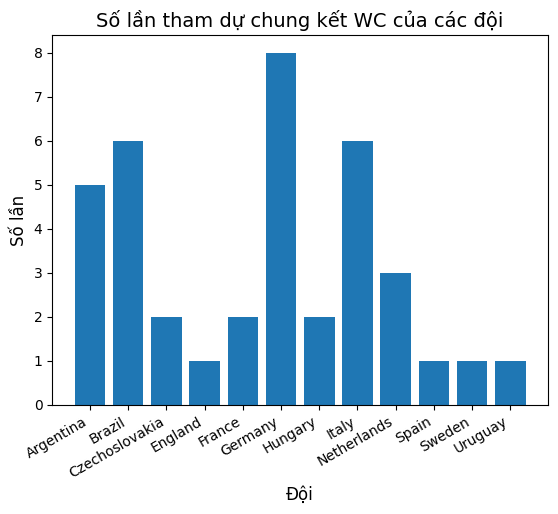

In [349]:

plt.bar(Final_dicts.index,Final_dicts.values)
plt.title('Số lần tham dự chung kết WC của các đội',fontsize = 14)
plt.xlabel('Đội',fontsize = 12)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Số lần',fontsize = 12)
plt.show()

### Vẽ biểu đồ so sánh số lần vô địch của các đội tuyển

In [350]:
Final_dicts = {}

for i in range(0,FinalMatches['Stage'].count(),1):
    winteam = ''
    if (FinalMatches['Home Team Goals'].iloc[i] > FinalMatches['Away Team Goals'].iloc[i]):
        winteam = FinalMatches['Home Team Name'].iloc[i]
    elif (FinalMatches['Home Team Goals'].iloc[i] < FinalMatches['Away Team Goals'].iloc[i]):
        winteam = FinalMatches['Away Team Name'].iloc[i]
    # Hòa phải đá penalties
    else:
        hometeam = FinalMatches['Home Team Name'].iloc[i]
        if (FinalMatches['Win conditions'].str.contains(hometeam).iloc[i]):
            winteam = FinalMatches['Home Team Name'].iloc[i]
        else:
            winteam = FinalMatches['Away Team Name'].iloc[i]
            
    if winteam in Final_dicts.keys():
        Final_dicts[winteam] += 1
    else:
        Final_dicts[winteam] = 1     

Final_dicts
    



{'Uruguay': 1,
 'Italy': 4,
 'Germany': 4,
 'Brazil': 5,
 'England': 1,
 'Argentina': 2,
 'France': 1,
 'Spain': 1}

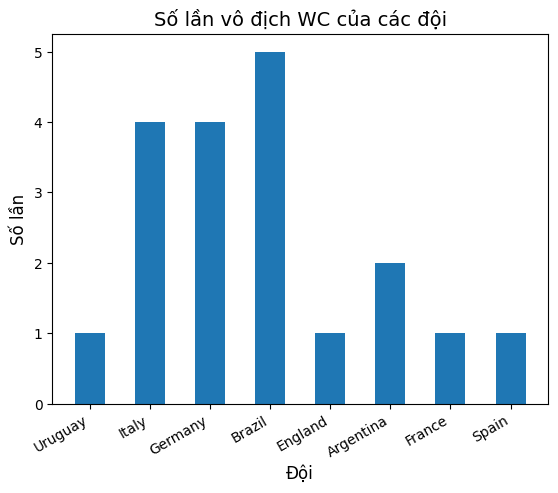

In [351]:
plt.bar(Final_dicts.keys(),Final_dicts.values(),width=0.5)
plt.title('Số lần vô địch WC của các đội',fontsize = 14)
plt.xlabel('Đội',fontsize = 12)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Số lần',fontsize = 12)
plt.show()

### Vẽ biểu đồ so sánh tỉ lệ giữa đội giành chiến thắng trong hiệp 1 và tỉ lệ đội giành chiến thắng cuối cùng của mỗi trận đấu

In [352]:
Matches['Half-time Win'] = ""
Matches['Match win'] = ""

for i in range(0,Matches['Stage'].count(),1):
    if (Matches['Half-time Home Goals'].iloc[i] > Matches['Half-time Away Goals'].iloc[i]):
        Matches['Half-time Win'].iloc[i] = Matches['Home Team Name'].iloc[i]
    elif (Matches['Half-time Home Goals'].iloc[i] < Matches['Half-time Away Goals'].iloc[i]):
        Matches['Half-time Win'].iloc[i] = Matches['Away Team Name'].iloc[i]
    else:
        Matches['Half-time Win'].iloc[i] = '-'
        
    if (Matches['Home Team Goals'].iloc[i] > Matches['Away Team Goals'].iloc[i]):
        Matches['Match win'].iloc[i] = Matches['Home Team Name'].iloc[i]
    elif (Matches['Home Team Goals'].iloc[i] < Matches['Away Team Goals'].iloc[i]):
        Matches['Match win'].iloc[i] = Matches['Away Team Name'].iloc[i]
    else:
        hometeam = Matches['Home Team Name'].iloc[i]
        if (Matches['Win conditions'].str.contains(hometeam).iloc[i]):
            Matches['Match win'].iloc[i] = Matches['Home Team Name'].iloc[i]
        else:
            Matches['Match win'].iloc[i] = Matches['Away Team Name'].iloc[i]



C:\Users\Admin-s\AppData\Local\Temp\ipykernel_10292\2544521455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Matches['Half-time Win'].iloc[i] = Matches['Home Team Name'].iloc[i]
C:\Users\Admin-s\AppData\Local\Temp\ipykernel_10292\2544521455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Matches['Match win'].iloc[i] = Matches['Home Team Name'].iloc[i]
C:\Users\Admin-s\AppData\Local\Temp\ipykernel_10292\2544521455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [353]:
MatchesResult = Matches[~Matches['Half-time Win'].str.contains('-')]


In [354]:
halfTimeWin = MatchesResult.groupby(['Half-time Win'])['Stage'].count()
halfTimeWin = halfTimeWin[halfTimeWin >= 10]
halfTimeWin

Half-time Win
Argentina         29
Belgium           10
Brazil            38
Czechoslovakia    10
England           18
France            19
Germany           42
Hungary           14
Italy             29
Netherlands       17
Portugal          10
Soviet Union      11
Spain             18
Sweden            13
Uruguay           13
Yugoslavia        11
Name: Stage, dtype: int64

In [355]:
MatchWin = MatchesResult[MatchesResult['Half-time Win']==MatchesResult['Match win']].groupby(['Match win'])['Stage'].count()

_dict = {}
for key in halfTimeWin.index:
    _dict[key] = MatchWin[key]

_dict
MatchWinSerries = pd.Series(_dict)


In [356]:
SubMatchesResult = pd.DataFrame({'Half-time Win':halfTimeWin,'Match Win':MatchWinSerries})
SubMatchesResult["Per"] =  round(100*SubMatchesResult['Match Win']/SubMatchesResult['Half-time Win'],2)
SubMatchesResult

,Half-time Win,Match Win,Per
Argentina,29,28,96.55
Belgium,10,7,70.00
Brazil,38,36,94.74
Czechoslovakia,10,7,70.00
England,18,16,88.89
France,19,18,94.74
Germany,42,39,92.86
Hungary,14,13,92.86
Italy,29,26,89.66
Netherlands,17,16,94.12


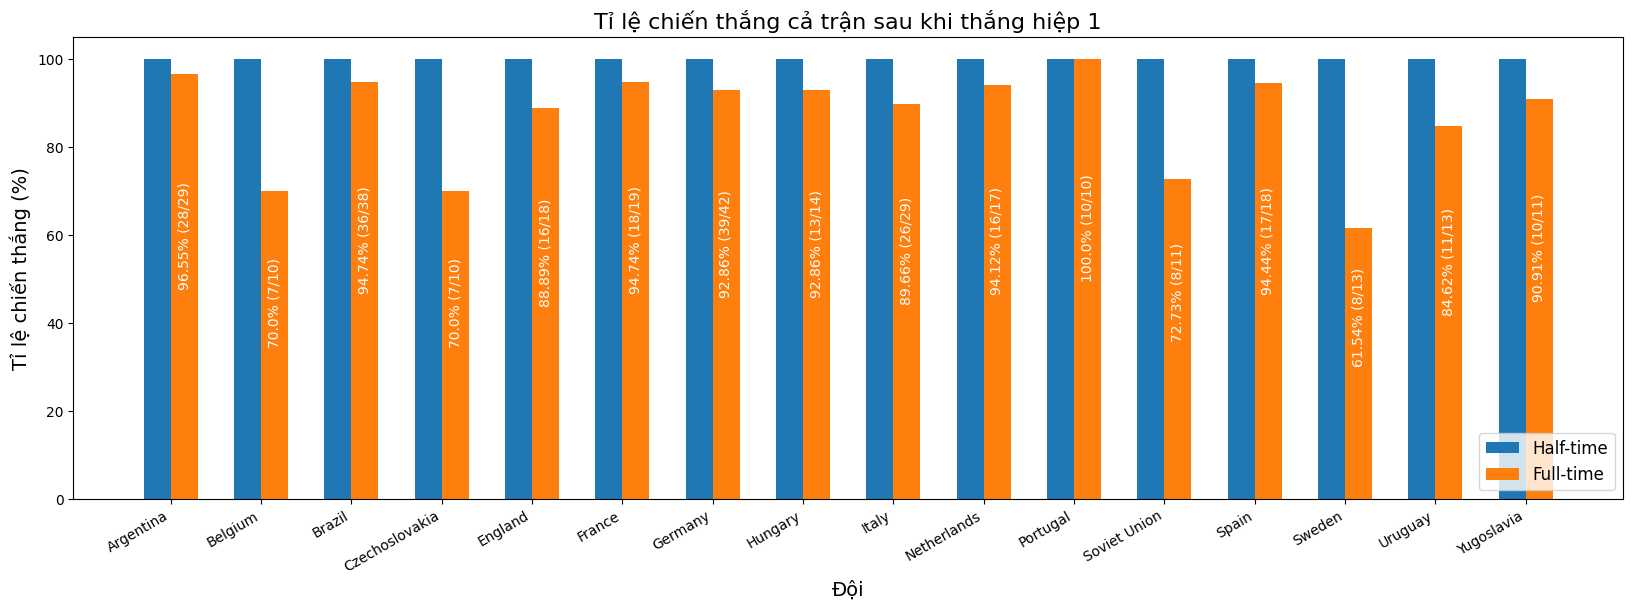

In [357]:
X = SubMatchesResult.index

# Xem giữa trận là 100%
Y = [100 for i in SubMatchesResult.index]

Z = SubMatchesResult["Per"]

X_axis = np.arange(len(X))

c1 = SubMatchesResult['Half-time Win']
c2 = SubMatchesResult['Match Win']

plt.bar(X_axis - 0.15, Y, width = 0.3, label = 'Half-time')
plt.bar(X_axis + 0.15, Z, width = 0.3, label = 'Full-time')

f = plt.gcf()
f.set_size_inches(20,6)
plt.xticks(X_axis, X,rotation = 30, ha = 'right')
plt.xlabel("Đội",fontsize = 14)
plt.ylabel("Tỉ lệ chiến thắng (%)",fontsize = 14)
plt.title("Tỉ lệ chiến thắng cả trận sau khi thắng hiệp 1",fontsize =  16)
plt.legend(fontsize = 12, loc = 'lower right')

for x, p,c1,c2 in zip(X_axis, Z,c1,c2):
   plt.text(x+0.07, p/2, str(p) + f'% ({c2}/{c1})',rotation = 90,color='w')
plt.show()

##### Theo biểu đồ:
- Portugal nếu thắng hiệp 1 sẽ thắng cả trận đấu với tỉ lệ 100%
- Các đội hầu như nếu thắng hiệp 1 sẽ thắng cả trận đấu với tỉ lệ trên 70% ngoại trừ Sweden

### Vẽ biểu đồ biểu diễn năm đội có số lần tham gia vòng chung kết nhiều nhất và tỉ lệ vô địch của năm đội đó

In [358]:
# Số lần tham dự WC
Teams = Matches.groupby(['Home Team Name','Year'])['Stage'].count()
a = pd.DataFrame([i[0] for i in Teams.index])
_Count = a.groupby([0])[0].count()
_Count.sort_values(inplace=True)
_Count = _Count[-5:]
_Count

0
Spain        14
Argentina    15
Germany      17
Italy        18
Brazil       19
Name: 0, dtype: int64

In [359]:
WCcount = sum(Final_dicts.values())

In [360]:
_Sub = pd.DataFrame({'Count':_Count,'Champion':Final_dicts})
_Sub.dropna(inplace=True)
_Sub['Per'] = round(_Sub['Champion']/WCcount,2)
_Sub

,Count,Champion,Per
Argentina,15.0,2,0.11
Brazil,19.0,5,0.26
Germany,17.0,4,0.21
Italy,18.0,4,0.21
Spain,14.0,1,0.05


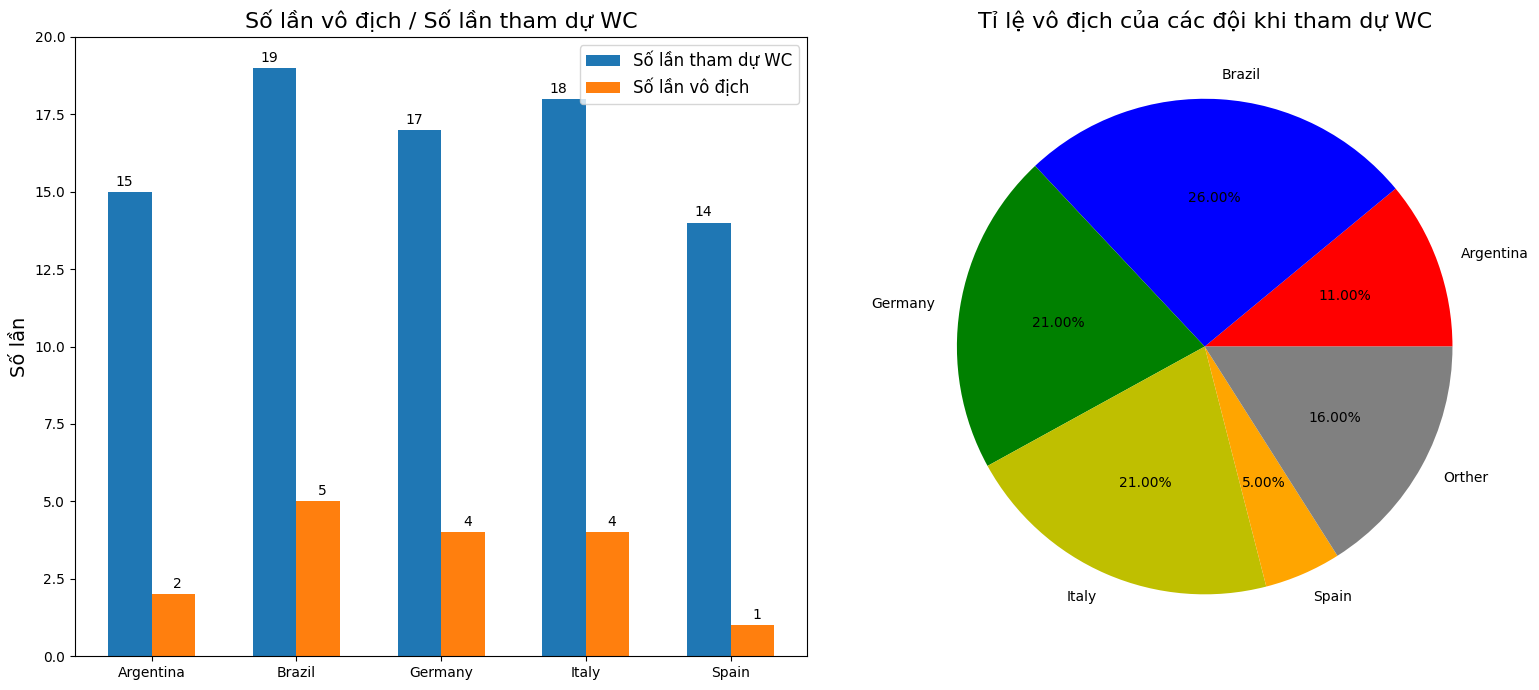

In [365]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,7)

X = _Sub.index

# Xem giữa trận là 100%
Y = _Sub['Count']

Z = _Sub['Champion']

X_axis = np.arange(len(X))

ax[0].bar(X_axis - 0.15, Y, width = 0.3, label = 'Số lần tham dự WC')
ax[0].bar(X_axis + 0.15, Z, width = 0.3, label = 'Số lần vô địch')
ax[0].set_xticks(X_axis, X)
ax[0].set_ylim(0,20)
ax[0].set_ylabel("Số lần",fontsize = 14)
ax[0].set_title("Số lần vô địch / Số lần tham dự WC",fontsize =  16)
ax[0].legend(fontsize = 12, loc = 'upper right')
for x,y,z in zip(X_axis, Y,Z):
   ax[0].text(x-0.25,y+0.2, int(y))
   ax[0].text(x+0.15,z+0.2, z)

X = X.insert(len(X),item ='Orther')
XX = _Sub['Per'].values
XX = np.append(XX,1-sum(XX))

color = ['r','b','g','y','orange','gray']
ax[1].pie(XX,labels = X ,autopct='%1.2f%%',colors = color)
ax[1].set_title("Tỉ lệ vô địch của các đội khi tham dự WC",fontsize =  16)
fig.tight_layout()
plt.show()